In [66]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import about, basis, destroy, mesolve, qeye, sigmaz, tensor, coherent

%matplotlib inline

In [12]:
# reintrouduce SI units

hbar = 1.0545718e-34;
a_rel = 3e-2 # atom relaxation time
Omega = 25e3 * 2 * np.pi # Rabi frequency
f = 51.99e9 # driving frequency
c_rel = 220e-6 # cavity relaxation time
dephase = 0 # dephasing rate

In [122]:
N = 50  # number of cavity fock states
n_th_a = 0.1  # temperature in frequency units
use_rwa = True

# parameters for revivals
kappa=0
gamma=0
g=0.1
wc=1
wa=1

tlist = np.linspace(0, 500, 500000)

In [123]:
# initial state
alpha = 4  # coherent state parameter
psi0 = tensor(coherent(N, alpha), basis(2, 0)) # for revivals we need coherent state

# collapse operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2).dag())
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() + a) * (sm + sm.dag())

In [124]:
c_op_list = []

# Photon annihilation
rate = kappa * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * a)

# Photon creation
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag())

# Atom annihilation
rate = gamma * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * sm)

# Atom creation
rate = gamma * n_th_a
c_op_list.append(np.sqrt(rate) * sm.dag())

In [125]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm], options={'nsteps': 50000})

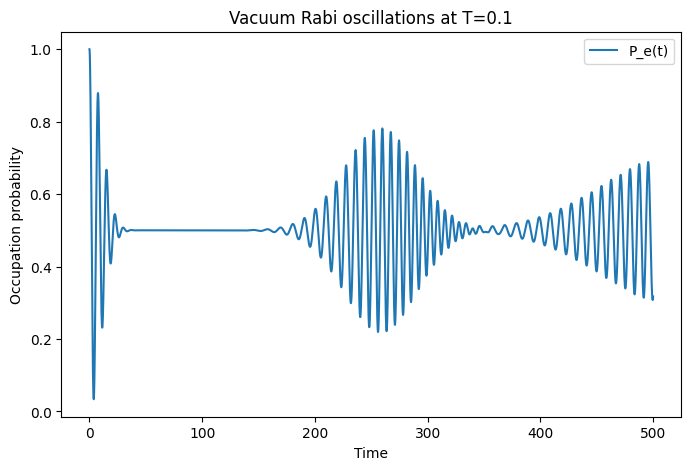

In [126]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[1], label="P_e(t)")
#ax.plot(tlist, output.expect[0], label="N(t)")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations at T={}".format(n_th_a));

In [129]:
# parameters for damped oscillations
N=2 # only two fock states
wc = f * 2 * np.pi  # cavity frequency
wa = (f + dephase) * 2 * np.pi  # atom frequency
g = -Omega / 2  # coupling strength
kappa = 1/c_rel  # cavity dissipation rate
gamma = 1/a_rel  # atom dissipation rate
n_th_a = 0.1  # temperature in frequency units

psi0 = tensor(basis(N, 0), basis(2, 0)) # for damped we start with Fock state
# collapse operators
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2).dag())
sz = tensor(qeye(N), sigmaz())

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa / 2 * sz + g * (a.dag() + a) * (sm + sm.dag())

c_op_list = []

# Photon annihilation
rate = kappa * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * a)

# Photon creation
rate = kappa * n_th_a
c_op_list.append(np.sqrt(rate) * a.dag())

# Atom annihilation
rate = gamma * (1 + n_th_a)
c_op_list.append(np.sqrt(rate) * sm)

# Atom creation
rate = gamma * n_th_a
c_op_list.append(np.sqrt(rate) * sm.dag())

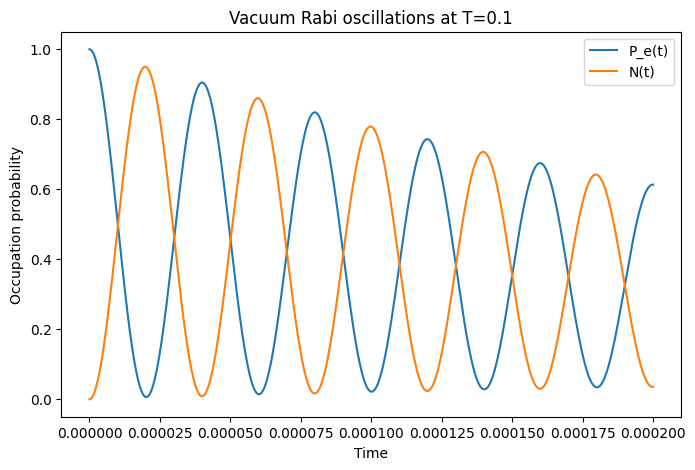

In [130]:
tlist = np.linspace(0, 200e-6, 20000)
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, output.expect[1], label="P_e(t)")
ax.plot(tlist, output.expect[0], label="N(t)")
ax.legend()
ax.set_xlabel("Time")
ax.set_ylabel("Occupation probability")
ax.set_title("Vacuum Rabi oscillations at T={}".format(n_th_a));